<a href="https://colab.research.google.com/github/abhilashuk/MyWorkSpace/blob/master/LogBERT_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anamoly Detection Algorithm using LogBERT**

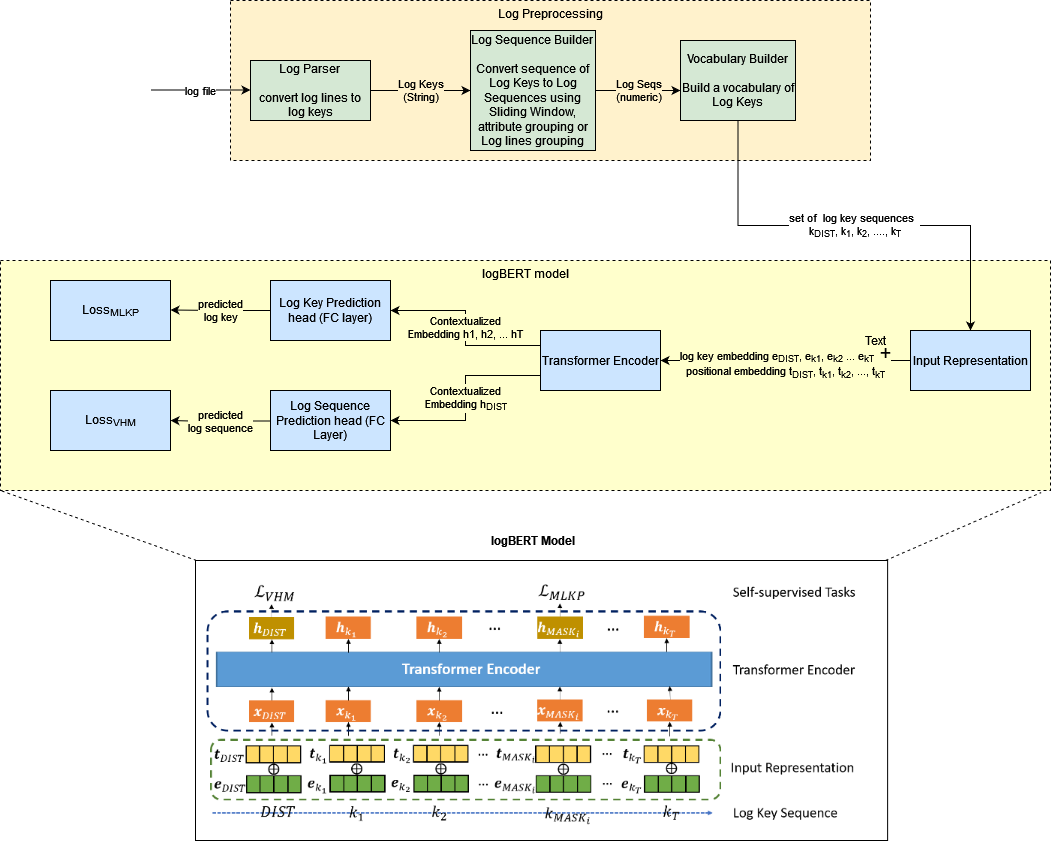

**Set up**

In [ ]:
import os
import sys

print(f'os.environ={os.environ}')
print(f'sys.argv={sys.argv}')
print(f"MLFLOW_TRACKING_URI{os.environ.get('MLFLOW_TRACKING_URI')}")
print(f"sys.executable={sys.executable}")
print(f"sys.path={sys.path}")

os.environ=environ({'NV_LIBCUBLAS_DEV_VERSION': '11.3.0.106-1', 'NV_CUDA_COMPAT_PACKAGE': 'cuda-compat-11-1', 'NV_CUDNN_PACKAGE_DEV': 'libcudnn8-dev=8.0.5.39-1+cuda11.1', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.8.4-1+cuda11.1', 'CLOUDSDK_PYTHON': 'python3', 'LANG': 'en_US.UTF-8', 'NV_LIBNPP_DEV_PACKAGE': 'libnpp-dev-11-1=11.1.2.301-1', 'HOSTNAME': '9e9ca84cabe7', 'OLDPWD': '/', 'CLOUDSDK_CONFIG': '/content/.config', 'NV_LIBNPP_VERSION': '11.1.2.301-1', 'NV_NVPROF_DEV_PACKAGE': 'cuda-nvprof-11-1=11.1.105-1', 'NVIDIA_VISIBLE_DEVICES': 'all', 'NV_NVPROF_VERSION': '11.1.105-1', 'NV_LIBCUSPARSE_VERSION': '11.3.0.10-1', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=172.28.0.2"],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'NV_LIBCUBLAS_DEV_PACKAGE': 'libcublas-dev-11-1=11.3.0.106-1', 'ENV': '/root/.bashrc', 'NCCL

**Downloading BGL2 Dataset into newly created output/bgl folder**

In [4]:
import os
os.system('git clone https://github.com/abhilashuk/logbert.git')
os.system('mkdir -p /content/logbert/output/bgl')
# Downloading BGL 2 Dataset 
# Github: https://github.com/logpai/loghub/tree/master/BGL
# Download: https://www.usenix.org/cfdr-data#hpc4
!wget -P /content/logbert/output/bgl \
        http://0b4af6cdc2f0c5998459-c0245c5c937c5dedcca3f1764ecc9b2f.r43.cf2.rackcdn.com/hpc4/bgl2.gz
!gzip -d /content/logbert/output/bgl/bgl2.gz

--2022-08-18 07:01:33--  http://0b4af6cdc2f0c5998459-c0245c5c937c5dedcca3f1764ecc9b2f.r43.cf2.rackcdn.com/hpc4/bgl2.gz
Resolving 0b4af6cdc2f0c5998459-c0245c5c937c5dedcca3f1764ecc9b2f.r43.cf2.rackcdn.com (0b4af6cdc2f0c5998459-c0245c5c937c5dedcca3f1764ecc9b2f.r43.cf2.rackcdn.com)... 23.63.240.162, 23.63.240.187, 2600:141b:7000::173f:f0a2, ...
Connecting to 0b4af6cdc2f0c5998459-c0245c5c937c5dedcca3f1764ecc9b2f.r43.cf2.rackcdn.com (0b4af6cdc2f0c5998459-c0245c5c937c5dedcca3f1764ecc9b2f.r43.cf2.rackcdn.com)|23.63.240.162|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62936464 (60M) [application/octet-stream]
Saving to: ‘/content/logbert/output/bgl/bgl2.gz’

bgl2.gz             100%[===================>]  60.02M  79.5MB/s    in 0.8s    

2022-08-18 07:01:34 (79.5 MB/s) - ‘/content/logbert/output/bgl/bgl2.gz’ saved [62936464/62936464]

